In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from datetime import datetime
df = pd.read_csv('../data/mbike_NamedStations_StartEndOnly.csv', index_col=0)

print(str(len(df.index)) + " Starting/Ending trip bike events.")
print(str(len(df.Coords_Latitude.unique())) + " unique Latitude Coordinates.")
print(str(len(df.Coords_Longitude.unique())) + " unique Longitude Coordinates.")


156602 Starting/Ending trip bike events.
24 unique Latitude Coordinates.
24 unique Longitude Coordinates.


## We will convert the current data_time to a python datetime object, then get the day of the week this corresponds to. 

In [3]:
def fixDateTime(row):
    s = row['Date_Time'].split("T")
    t = s[1].split(".")[0]
    date = s[0]
    datetime = date +" " + t
    #print(date)
    return pd.Series([datetime])

df[['Date_Time']] = df.apply(fixDateTime, axis=1)
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')
df['Day'] = pd.to_datetime(df['Date_Time']).dt.dayofweek
df.head(1)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2


In [4]:
#df['TimeofDay'] = pd.to_datetime(df['Date_Time']).dt.dayofweek
df.head(5)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2
1,38.978129,-76.929079,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15 20:07:14,2017-06-15,20:07:14,College Park Metro West,3
2,38.972794,-76.938213,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15 20:19:43,2017-06-15,20:19:43,Queens Chapel,3
3,38.978129,-76.929079,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17 22:25:55,2017-06-17,22:25:55,College Park Metro West,5
4,38.972794,-76.938213,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17 22:36:07,2017-06-17,22:36:07,Queens Chapel,5


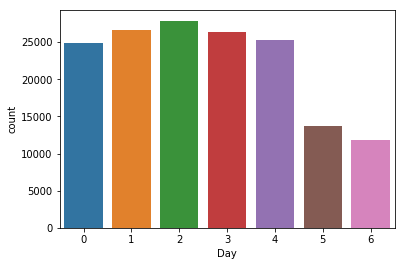

In [5]:
sns.countplot(x="Day", data= df)

/home/luc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 400)

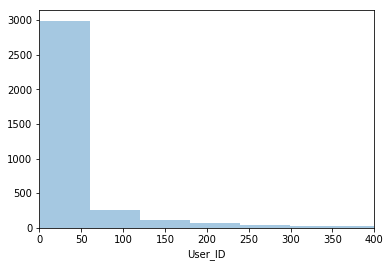

In [6]:
sns.distplot(df['User_ID'].value_counts()[:], norm_hist=False, kde=False)
plt.xlim(0,400)

In [7]:
df.head(5).Date_Time.dt.dayofweek

0    2
1    3
2    3
3    5
4    5
Name: Date_Time, dtype: int64

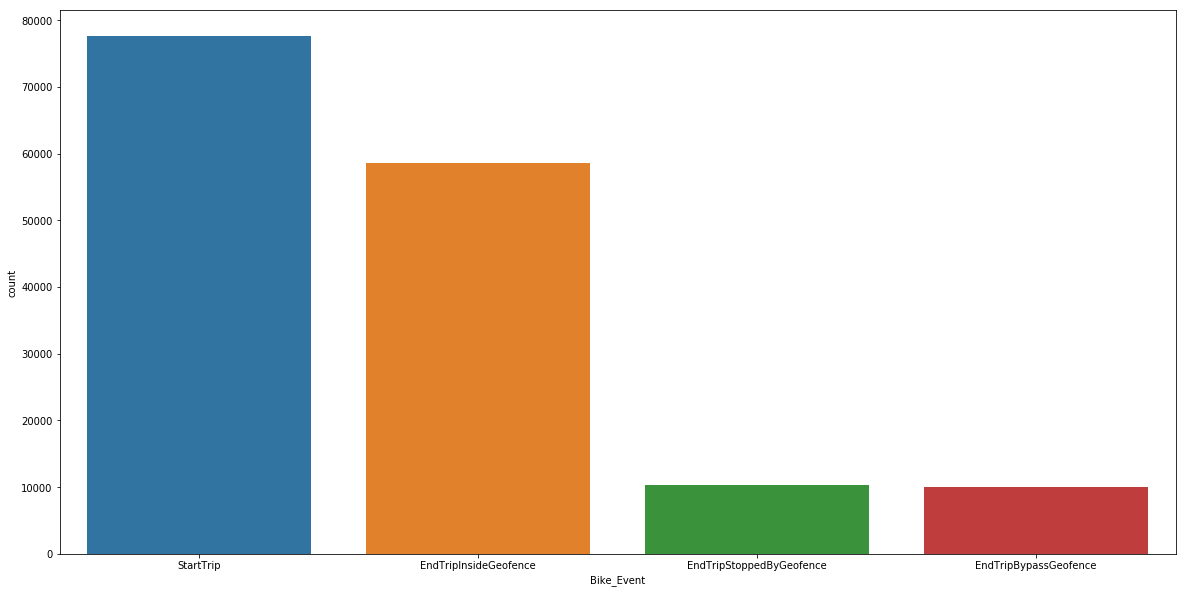

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.countplot(df.Bike_Event)

In [9]:
df.Bike_Event.value_counts()

StartTrip                   77600
EndTripInsideGeofence       58665
EndTripStoppedByGeofence    10357
EndTripBypassGeofence        9980
Name: Bike_Event, dtype: int64

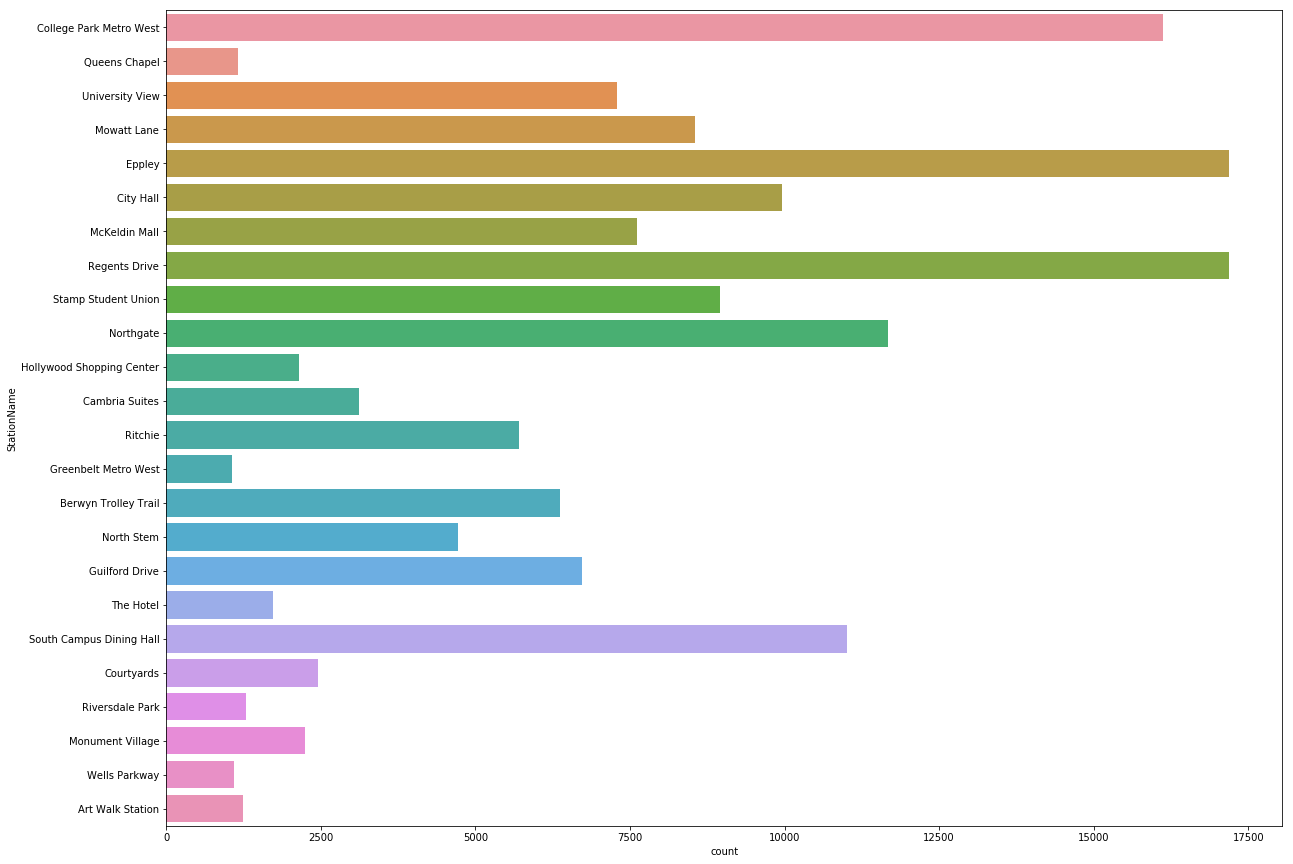

In [10]:
plt.rcParams['figure.figsize'] = [20, 15]
ax = sns.countplot(y="StationName", data=df)

In [11]:
dfStation = pd.read_csv('../data/stationsInfo.csv')
dfStation.head(3)

,Name,Altitude,Longitude,Latitude
0,Hollywood Shopping Center,42,-76.921340,39.013710
1,Greenbelt Metro West,30,-76.913859,39.010546
2,Monument Village,40,-76.930522,39.004601


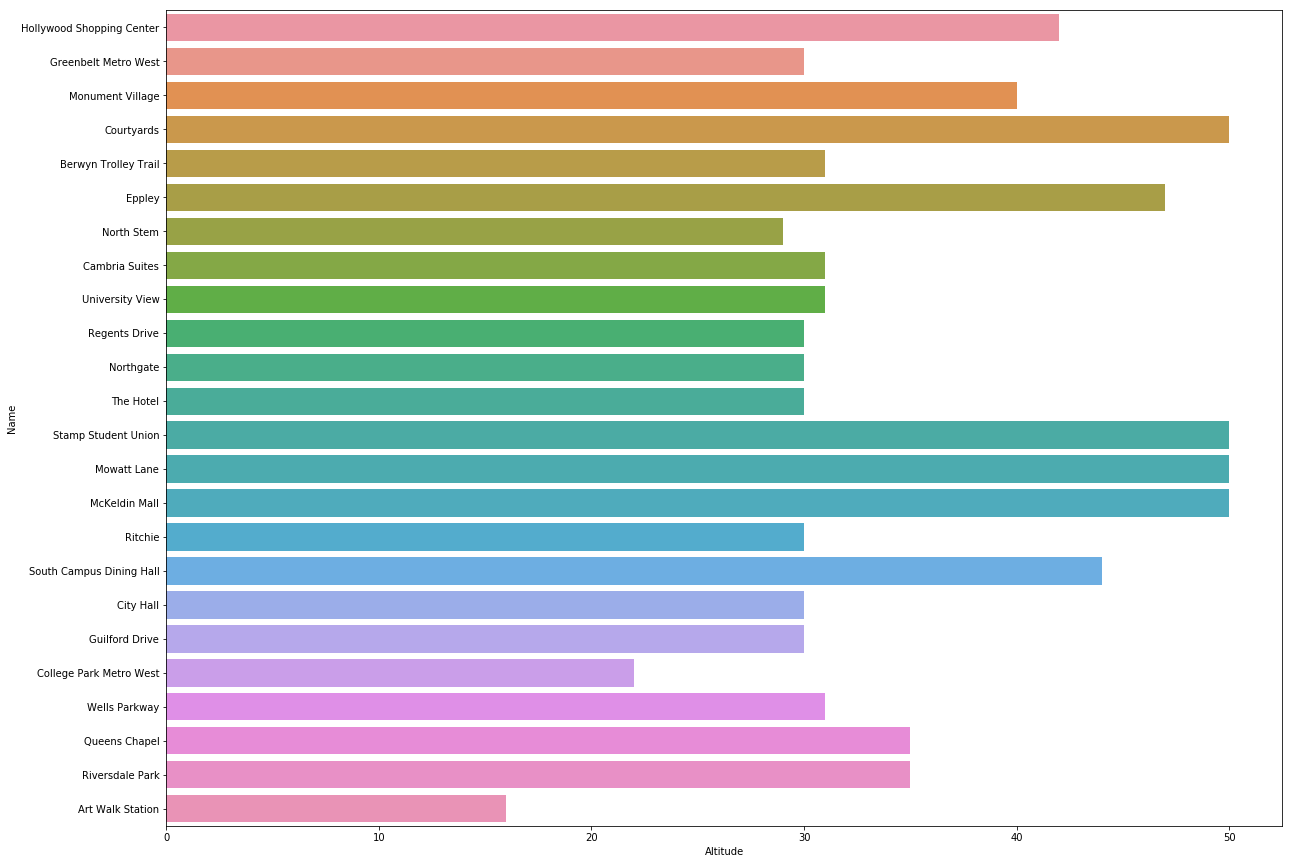

In [12]:
#sns.countplot(y="StationName")
ax = sns.barplot(y="Name", x="Altitude", data=dfStation)

In [13]:
df.head(5)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2
1,38.978129,-76.929079,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15 20:07:14,2017-06-15,20:07:14,College Park Metro West,3
2,38.972794,-76.938213,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15 20:19:43,2017-06-15,20:19:43,Queens Chapel,3
3,38.978129,-76.929079,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17 22:25:55,2017-06-17,22:25:55,College Park Metro West,5
4,38.972794,-76.938213,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17 22:36:07,2017-06-17,22:36:07,Queens Chapel,5


In [103]:
#Original length of start+end trip events (~156000)
df = df[df['Date_Time'] > datetime(2018,3,1)] #After 03/2018 had 23 stations!!!!
print(len(df.index)) # 104031
#print(df[df['Date_Time'] > datetime(2017,3,1)].Date_Time)

104031


In [91]:
# Split into Start/Ends
# keep only if after 03/2018 ******
dfStart = df[df["Bike_Event"] == 'StartTrip'] # 51654
dfEnd = df[df["Bike_Event"]!= 'StartTrip']  # 52377,
# So, -723 (More ends than starts). Weight for ends:
print(len(dfStart.index)/len(dfEnd.index))
weight = len(dfStart.index)/len(dfEnd.index)
dfStart.head(2)

0.9861962311701701


,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
3289,38.978129,-76.929079,ejjmjSNr54JWH9max,StartTrip,292B39TcJhzNwQuDf,2018-04-24 12:01:19,2018-04-24,12:01:19,College Park Metro West,1
3323,38.989979,-76.940757,qpZpMNkiJkJ4vmBpB,StartTrip,292B39TcJhzNwQuDf,2018-04-25 20:43:46,2018-04-25,20:43:46,Regents Drive,2


In [61]:
#How correlated is altitude to usage?

dfPlot = pd.DataFrame(dfStart.StationName.value_counts())#Returns a series in descending order, converts to df
dfPlot1 = pd.DataFrame(dfEnd.StationName.value_counts())
dfPlot.columns = ['StartFreq']
dfPlot1.columns = ['EndFreq']
# dfmergeSE consists of Stations and info, and the number of start/end trips.
dfmergeS = dfStation.join(dfPlot, on='Name')
dfmergeSE = dfmergeS.join(dfPlot1, on='Name')
dfmergeSE['Diff'] = dfmergeSE['StartFreq']-dfmergeSE['EndFreq']
dfmergeSE['Total'] = dfmergeSE['StartFreq']+dfmergeSE['EndFreq']

In [105]:
dfmergeSE.Diff.sum()
dfmergeSE.head(5)

,Name,Altitude,Longitude,Latitude,StartFreq,EndFreq,Diff,Total,Diff_Norm
0,Hollywood Shopping Center,42,-76.921340,39.013710,803,804,-1,1607,10.098230
1,Greenbelt Metro West,30,-76.913859,39.010546,393,409,-16,802,-10.354259
2,Monument Village,40,-76.930522,39.004601,828,663,165,1491,174.151899
3,Courtyards,50,-76.942093,39.002302,726,743,-17,1469,-6.743800
4,Berwyn Trolley Trail,31,-76.926618,38.994689,1906,1887,19,3793,45.047712


In [106]:
dfmergeSE['Diff_Norm'] = dfmergeSE['StartFreq']-weight*dfmergeSE['EndFreq']
dfmergeSE.Diff_Norm.sum()

1.4779288903810084e-12

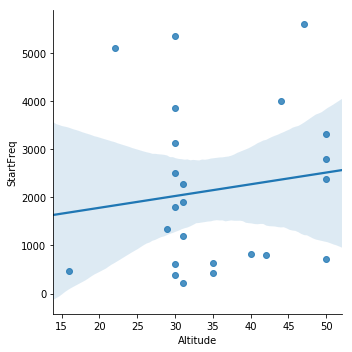

In [65]:
sns.lmplot(x='Altitude', y='StartFreq', data=dfmergeSE)

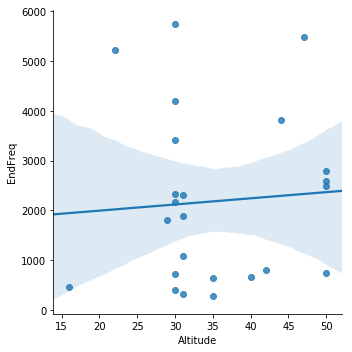

In [68]:
sns.lmplot(x='Altitude', y='EndFreq', data=dfmergeSE)

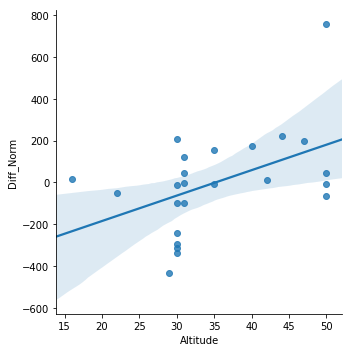

In [66]:
sns.lmplot(x='Altitude', y='Diff_Norm', data=dfmergeSE)

In [79]:
'''from scipy import stats
# Use scipy.stats to get the linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfmergeSE['Altitude'],dfmergeSE['StartTrips'])

# Pass parameters of fit using line_kws for legend
ax = sns.regplot(x="Altitude", y="Net_Norm", data=dfmergeSE, 
 line_kws={'label':"y={0:.1f}x+{1:.1f} | r={2:f}".format(slope,intercept,r_value)})
ax.legend()
plt.show()'''

'from scipy import stats\n# Use scipy.stats to get the linear fit\nslope, intercept, r_value, p_value, std_err = stats.linregress(dfmergeSE[\'Altitude\'],dfmergeSE[\'StartTrips\'])\n\n# Pass parameters of fit using line_kws for legend\nax = sns.regplot(x="Altitude", y="Net_Norm", data=dfmergeSE, \n line_kws={\'label\':"y={0:.1f}x+{1:.1f} | r={2:f}".format(slope,intercept,r_value)})\nax.legend()\nplt.show()'

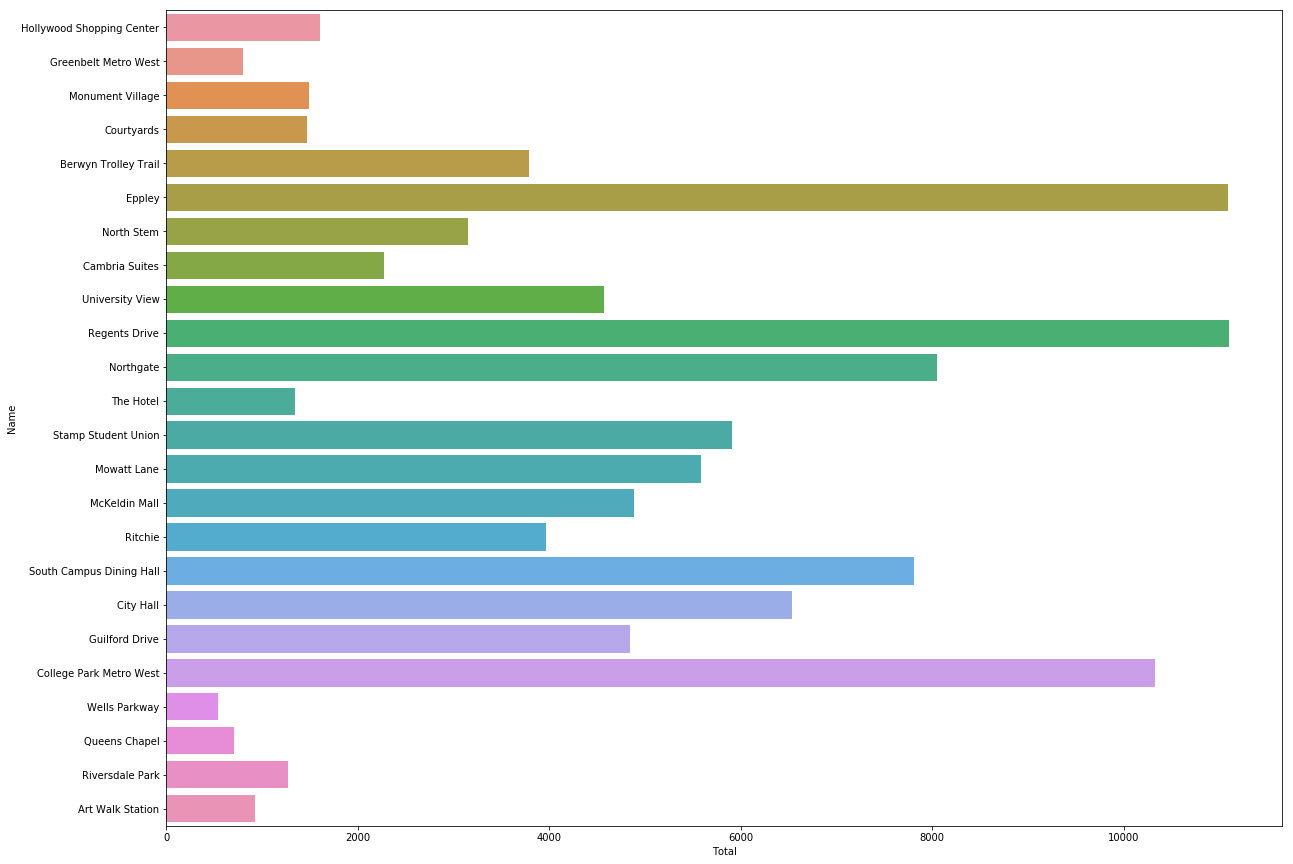

In [67]:
#ax = sns.barplot(y="Name", x="Diff_Norm", data=dfmergeSE[dfmergeSE['Diff_Norm'] < 0])
#ax = sns.barplot(y="Name", x="Diff_Norm", data=dfmergeSE)
ax = sns.barplot(y="Name", x="Total", data=dfmergeSE)


# Make maps of stations where their bubble marker represents usages. 

In [39]:
dfmergeSE.head(5)
dfmergeSE.to_csv("stationsInfo_TripCounts.csv")

In [59]:
#Make a map over all time of Net_Norm (StartTrips-weight*EndTrips)
import folium
m = folium.Map(location=[dfmergeSE['Latitude'].mean(),dfmergeSE['Longitude'].mean()], zoom_start=14)

# Red will mean more bikes ended than started, Blue means more started than ended
for i in range(0,len(dfmergeSE)):
    net_norm = dfmergeSE.iloc[i]['Diff_Norm']
    if (net_norm>0): 
        c ='crimson'
    else: 
        c = 'blue' 

    folium.Circle(
      location=[dfmergeSE.iloc[i]['Latitude'], dfmergeSE.iloc[i]['Longitude']],
      popup=dfmergeSE.iloc[i]['Name'],
      radius=abs(net_norm)*(0.15),
      color=c,
      fill=True,
      fill_color=c
   ).add_to(m)
m
m.save('march2018_map.html')

#Make a map over all time of usage
m = folium.Map(location=[dfmergeSE['Latitude'].mean(),dfmergeSE['Longitude'].mean()], zoom_start=14)

# Red will mean more bikes ended than started, Blue means more started than ended
for i in range(0,len(dfmergeSE)):
    net_norm = dfmergeSE.iloc[i]['StartFreq'] + dfmergeSE.iloc[i]['EndFreq']
    if (net_norm>0): 
        c ='crimson'
    else: 
        c = 'blue' 

    folium.Circle(
      location=[dfmergeSE.iloc[i]['Latitude'], dfmergeSE.iloc[i]['Longitude']],
      popup=dfmergeSE.iloc[i]['Name'],
      radius=abs(net_norm)*(0.01),
      color=c,
      fill=True,
      fill_color=c
   ).add_to(m)
m
m.save('usageAfterMarch2018_map.html')

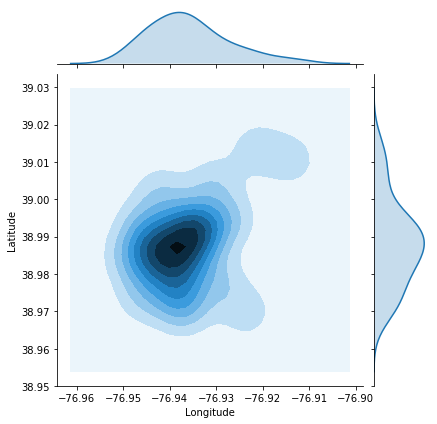

In [41]:
g = sns.jointplot("Longitude", "Latitude", data=dfmergeSE,joint_kws=dict(gridsize=35))

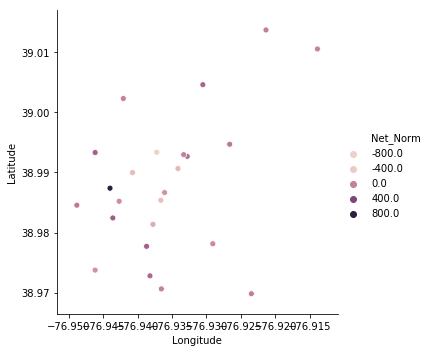

In [42]:
sns.relplot(x="Longitude", y="Latitude", hue="Net_Norm", data=dfmergeSE);

# Transform data into a table of Completed Routes
(This has Trip_ID,User_ID,Start_Station,End_Station,Start_Time,End_Time, etc)

In [43]:
dfS = dfStart.set_index("Trip_ID")
dfE = dfEnd.set_index("Trip_ID")

In [83]:
dfS.head(3)
dfE.head(3)

,Coords_Latitude,Coords_Longitude,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
Trip_ID,,,,,,,,,
cvaLjh9vKtcdeQhrM,38.989979,-76.940757,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-23 13:06:02,2018-04-23,13:06:02,Regents Drive,0
qpZpMNkiJkJ4vmBpB,38.978129,-76.929079,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-25 20:51:46,2018-04-25,20:51:46,College Park Metro West,2
dLxcJ43rmJLZ7Mv2N,38.978129,-76.929079,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-27 20:42:58,2018-04-27,20:42:58,College Park Metro West,4


In [49]:
#Join on trip ID, keep coords
#Use dfStart, dfEnd. For each trip_ID, get start & end info Lat/Long and station.
dfTrips = dfS.join(dfE, lsuffix='_S', rsuffix='_E')

In [47]:
'''['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',
       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',
       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',
       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E']'''
dfTrips.columns

Index(['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',
       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',
       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',
       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E'],
      dtype='object')

In [48]:
#Remove incomplete trips!
def durInMinutes(row):
    t_E= row['Date_Time_E'] 
    t_S = row['Date_Time_S']
    dur = (t_E - t_S).seconds
    dur = round(dur/60,2)
    return pd.Series([dur])
dfTrips.head(5)
dfCompleteTrips = dfTrips.dropna(subset=['StationName_S', 'StationName_E'])
#dfCompleteTrips['Duration'] = dfCompleteTrips['Date_Time_E'] - dfCompleteTrips['Date_Time_S']
dfCompleteTrips['Duration'] = dfCompleteTrips.apply(durInMinutes, axis=1)
# print(len(dfTrips.index)) print(len(dfCompleteTrips.index))
# duration = (after - before) // timedelta(seconds=3600)
print(str((len(dfCompleteTrips.index)/(len(dfTrips.index)))*100) + "% of trips were completed. Rest were missing start or end event.")
dfCompleteTrips.head(5)


85.639743632764% of trips were completed. Rest were missing start or end event.


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
224m5sDwixLcZAtHY,38.989979,-76.940757,StartTrip,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:34:49,2018-03-09,12:34:49,Regents Drive,4,38.969811,-76.923467,EndTripInsideGeofence,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:48:15,2018-03-09,12:48:15,Art Walk Station,4.0,13.43
229w9YBqSsH8GLiDqB3vREit,38.984549,-76.948848,StartTrip,N2duvRsnp8qbGDE9j,2018-12-05 02:26:10,2018-12-05,02:26:10,Mowatt Lane,2,38.981365,-76.937776,EndTripInsideGeofence,N2duvRsnp8qbGDE9j,2018-12-05 02:33:47,2018-12-05,02:33:47,City Hall,2.0,7.62
22A97tQpvoZWzsjs4,38.977703,-76.938708,StartTrip,iEmvgTPzoWvqEXf2w,2018-03-09 13:06:39,2018-03-09,13:06:39,Guilford Drive,4,38.978129,-76.929079,EndTripInsideGeofence,iEmvgTPzoWvqEXf2w,2018-03-09 13:11:15,2018-03-09,13:11:15,College Park Metro West,4.0,4.60
22Ld6zu6nzqRdSTNs,38.994689,-76.926618,StartTrip,ZQbLrsCivffAR5SKo,2018-06-09 16:18:35,2018-06-09,16:18:35,Berwyn Trolley Trail,5,38.993316,-76.946189,EndTripInsideGeofence,ZQbLrsCivffAR5SKo,2018-06-09 16:28:27,2018-06-09,16:28:27,Eppley,5.0,9.87
22Yr5G8KH89rx9B5FF8TfAen,39.002302,-76.942093,StartTrip,5jfC3BBByT92N9srTYtt8ir8,2018-10-02 23:12:02,2018-10-02,23:12:02,Courtyards,1,38.982425,-76.943613,EndTripInsideGeofence,5jfC3BBByT92N9srTYtt8ir8,2018-10-02 23:32:30,2018-10-02,23:32:30,South Campus Dining Hall,1.0,20.47


## Distribution of Trip duration
- 96.1% are under 60 minutes
- 99.115% of trips are under 200 minutes

0.9657347726426738
count    51043.000000
mean        16.634915
std         60.445580
min          0.030000
25%          4.700000
50%          7.330000
75%         11.720000
max       1439.800000
Name: Duration, dtype: float64


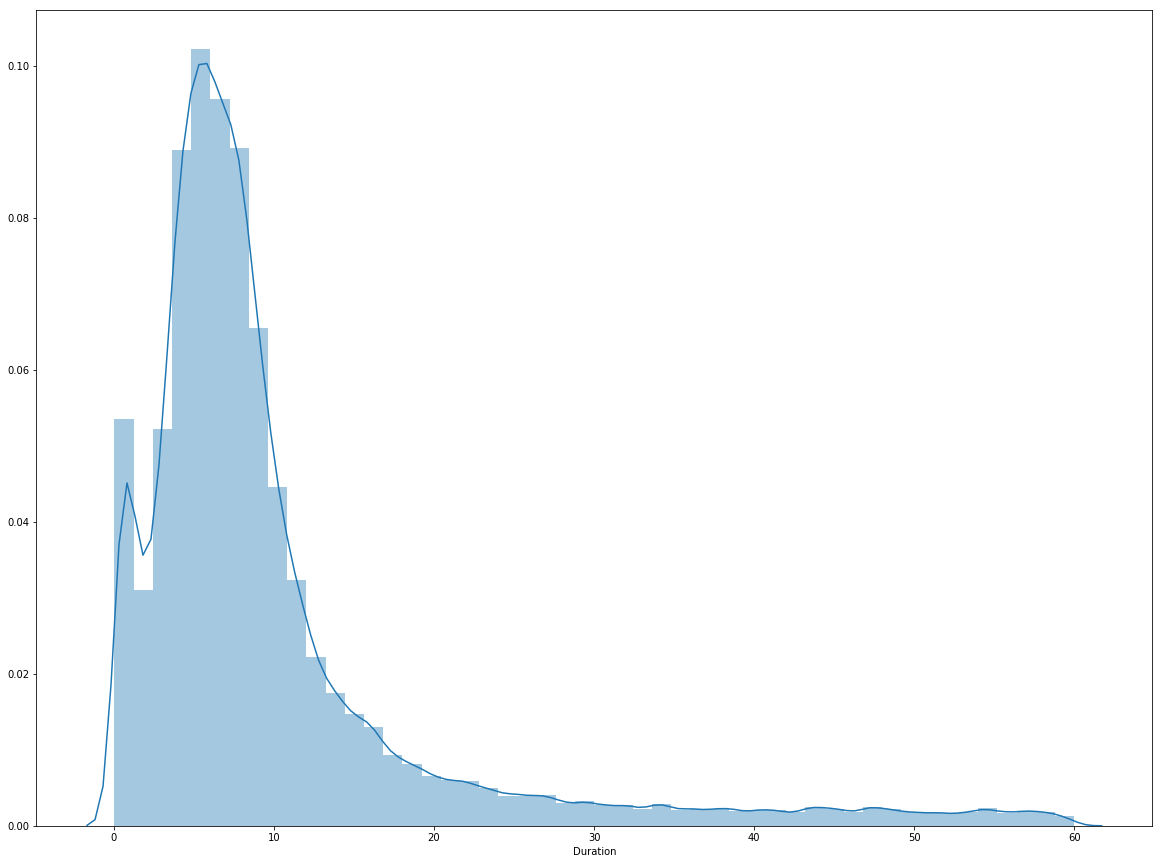

In [82]:
sns.distplot(dfCompleteTrips[dfCompleteTrips["Duration"] <= 60].Duration)
#sns.distplot(dfCompleteTrips[dfCompleteTrips.Duration)

print(len(dfCompleteTrips[dfCompleteTrips["Duration"] <= 60].index)/len(dfCompleteTrips.index))
print(dfCompleteTrips.Duration.describe())

In [164]:
dfCompleteTrips.to_csv('CompletedMBikeTrips.csv',index='False')

In [81]:
#Count number of times each route is taken!
count_series = dfCompleteTrips.groupby(['StationName_S', 'StationName_E']).size()
dfRoutes = count_series.to_frame(name = 'Frequency').reset_index()
dfRoutes.to_csv("routeFrequency.csv",index=False)
dfRoutes.head(2)
#dfRoutes.sort_values(by=['Frequency'], ascending=False)

,StationName_S,StationName_E,Frequency
0,Art Walk Station,Art Walk Station,101
1,Art Walk Station,Berwyn Trolley Trail,18


In [90]:
dfCompleteTrips.head(3)

,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
224m5sDwixLcZAtHY,38.989979,-76.940757,StartTrip,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:34:49,2018-03-09,12:34:49,Regents Drive,4,38.969811,-76.923467,EndTripInsideGeofence,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:48:15,2018-03-09,12:48:15,Art Walk Station,4.0,13.43
229w9YBqSsH8GLiDqB3vREit,38.984549,-76.948848,StartTrip,N2duvRsnp8qbGDE9j,2018-12-05 02:26:10,2018-12-05,02:26:10,Mowatt Lane,2,38.981365,-76.937776,EndTripInsideGeofence,N2duvRsnp8qbGDE9j,2018-12-05 02:33:47,2018-12-05,02:33:47,City Hall,2.0,7.62
22A97tQpvoZWzsjs4,38.977703,-76.938708,StartTrip,iEmvgTPzoWvqEXf2w,2018-03-09 13:06:39,2018-03-09,13:06:39,Guilford Drive,4,38.978129,-76.929079,EndTripInsideGeofence,iEmvgTPzoWvqEXf2w,2018-03-09 13:11:15,2018-03-09,13:11:15,College Park Metro West,4.0,4.60


## Weekday overall hourly bike usage (Start trips)
This data shows that bikes are rarely used for morning commutes. People are much more likely to use mBikes to commute after 12pm. This usage spikes at 9pm, and then we see that at 12am people are almost just as likely to begin a trip as at 12pm!

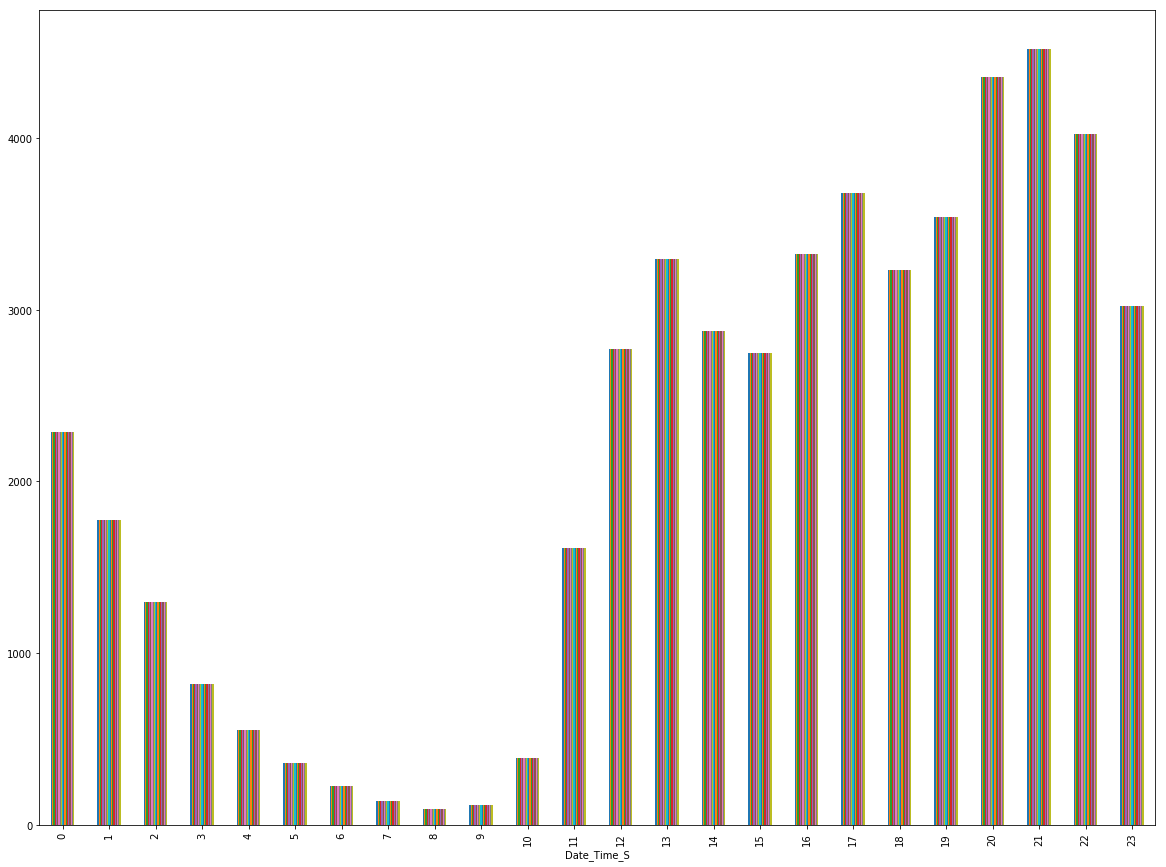

In [89]:
#Weekday plots
#dfNew =dfCompleteTrips[(dfCompleteTrips['StationName_S'] == 'City Hall') & (dfCompleteTrips['Day_S'] > 4)]
dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] >= 0) | (dfCompleteTrips['Day_S'] <= 4)]
#dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] > 5)]

dfNew.groupby([dfNew["Date_Time_S"].dt.hour]).count().plot(kind="bar",legend=False)
#dfNew.groupby([dfNew["Date_Time_S"].dt.year, dfNew["Date_Time_S"].dt.month]).count().plot(kind="bar")

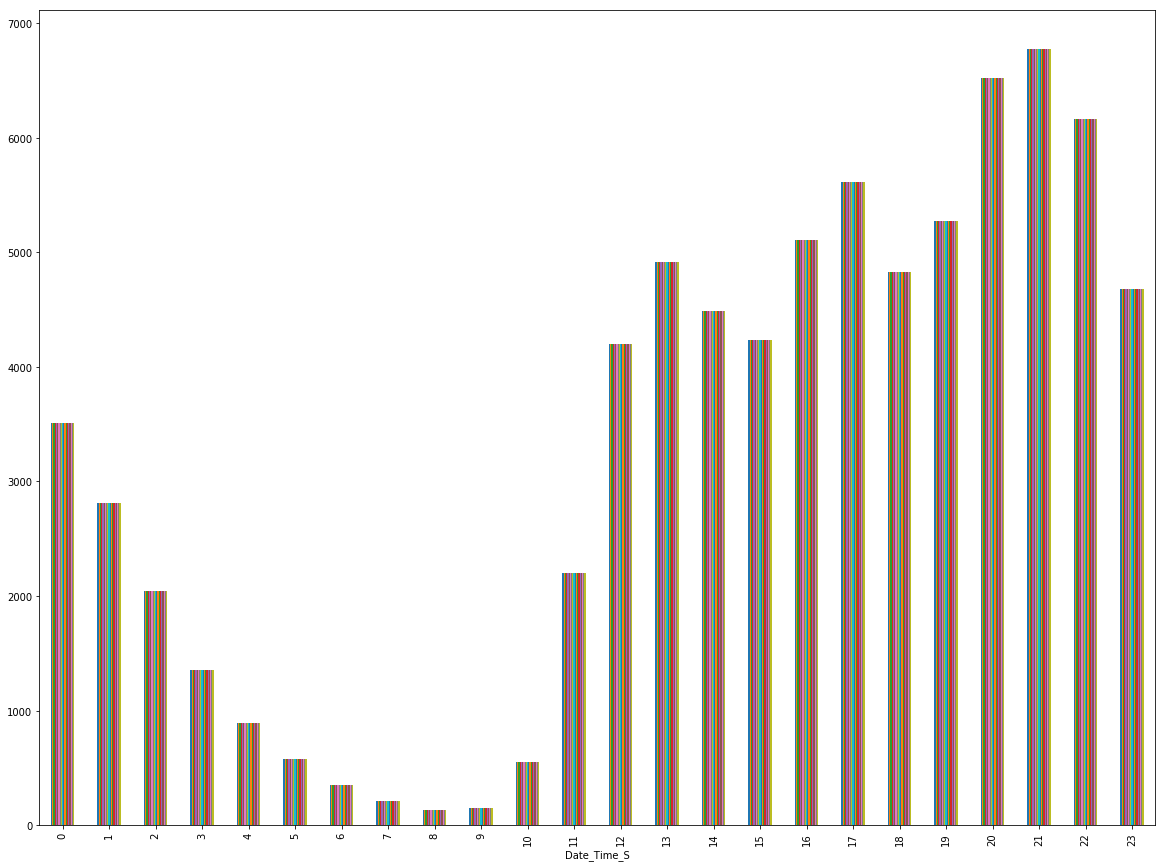

### Table showing average weekday bike differential by station
Station: Morning bike diff | Midday Bike diff | Evening Bike diff | Late Bike diff

In [149]:
df.head(2)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
3287,38.989979,-76.940757,cvaLjh9vKtcdeQhrM,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-23 13:06:02,2018-04-23,13:06:02,Regents Drive,0
3289,38.978129,-76.929079,ejjmjSNr54JWH9max,StartTrip,292B39TcJhzNwQuDf,2018-04-24 12:01:19,2018-04-24,12:01:19,College Park Metro West,1


In [193]:
# Split into Start/Ends
# keep only if after 03/2018 ******

dfWeekdays = df[(df["Day"] <=4) & (df["Day"]>=0)]
print(dfWeekdays['Date_Time'].max())
print(dfWeekdays['Date_Time'].min())

#Split into 4 dataframes, corresponding to morning, mid-day, evening and Late:
dfWeekdaysM = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 4) & (dfWeekdays['Date_Time'].dt.hour < 10)]
dfWeekdaysMid = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 10) & (dfWeekdays['Date_Time'].dt.hour < 16)]
dfWeekdaysEve = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 16) & (dfWeekdays['Date_Time'].dt.hour < 22)]
dfWeekdaysLate = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 22) | (dfWeekdays['Date_Time'].dt.hour < 4) ]


######################################################[###

'''
#dfStartWd1 = dfStartWd.apply(getSection1, axis=1)
dfStartWdM = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 4) & (dfStartWd['Date_Time'].dt.hour < 10)]
dfStartWdMid = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 10) & (dfStartWd['Date_Time'].dt.hour < 16)]
dfStartWdEve = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 16) & (dfStartWd['Date_Time'].dt.hour < 22)]
dfStartWdLate = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 22) | (dfStartWd['Date_Time'].dt.hour < 4) ]
'''

#Section into time slots of 4-10am,10am-4pm, 4-10pm, 10pm-4am
#dfStartWd1 = dfStartWd[(dfStartWd['Date_Time'].hour <= 10) & (dfStartWd['Date_Time'].hour >= 4)]
#print(len(dfStartWd1.index))
def getUsage(dfByTime, periodString):
    a = dfByTime[dfByTime["Bike_Event"] == 'StartTrip'].StationName.value_counts()
    b = dfByTime[dfByTime["Bike_Event"] != 'StartTrip'].StationName.value_counts()*weight
    dfComb = pd.DataFrame(a-b)
    periodString = periodString + ' Usage'
    dfComb.columns = [periodString] # Negative means more end trips
    dfComb[periodString] = dfComb[periodString].fillna(0).astype('int64')
    return dfComb

dfCombM = getUsage(dfWeekdaysM, 'Morning')
dfCombMid = getUsage(dfWeekdaysMid, 'Mid-day')
dfCombEve = getUsage(dfWeekdaysEve, 'Evening')
dfCombLate = getUsage(dfWeekdaysLate, 'Late')

'''
###
a = dfWeekdaysM[dfWeekdaysM["Bike_Event"] == 'StartTrip'].StationName.value_counts()
b = dfWeekdaysM[dfWeekdaysM["Bike_Event"] != 'StartTrip'].StationName.value_counts()
dfCombM = pd.DataFrame(a-b)
dfCombM.columns = ['Usage Count'] # Negative means more end trips



c = dfWeekdaysMid[dfWeekdaysMid["Bike_Event"] == 'StartTrip'].StationName.value_counts()
d = dfWeekdaysMid[dfWeekdaysMid["Bike_Event"] != 'StartTrip'].StationName.value_counts()
dfCombMid = pd.DataFrame(c-d)
dfCombMid.columns = ['Usage Count'] # Negative means more end trips
dfCombMid.head(24)
'''

dfCombM.head(2)
dfCombMid.head(2)
dfCombEve.head(2)
dfCombLate.head(2)

#dfWeekdaysM_Comb = pd.DataFrame([]
#dfWeekdaysMid[dfWeekdaysMid["Bike_Event"] != 'StartTrip'].StationName.value_counts()
#dfWeekdaysMid[dfWeekdaysMid["Bike_Event"] == 'StartTrip'].StationName.value_counts()

#dfWeekdaysEve[dfWeekdaysEve["Bike_Event"] != 'StartTrip'].StationName.value_counts()
#dfWeekdaysEve[dfWeekdaysEve["Bike_Event"] == 'StartTrip'].StationName.value_counts()

#dfWeekdaysLate[dfWeekdaysLate["Bike_Event"] != 'StartTrip'].StationName.value_counts()
#dfWeekdaysLate[dfWeekdaysLate["Bike_Event"] == 'StartTrip'].StationName.value_counts()

2019-01-14 23:45:51
2018-03-01 00:00:06


,Late Usage
Art Walk Station,-6
Berwyn Trolley Trail,-408


In [194]:

dfBigCat = pd.concat([dfCombM, dfCombMid, dfCombEve, dfCombLate], axis=1, join='outer')






dfBigCat.head(24)


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Morning Usage,Mid-day Usage,Evening Usage,Late Usage
Art Walk Station,NaN,-209,227,-6
Berwyn Trolley Trail,-6.0,686,-234,-408
Cambria Suites,-14.0,144,0,-65
City Hall,34.0,242,-261,-187
College Park Metro West,-20.0,-637,363,261
Courtyards,-6.0,124,-101,-54
Eppley,-68.0,146,-156,205
Greenbelt Metro West,1.0,-84,34,23
Guilford Drive,-27.0,743,-218,-384
Hollywood Shopping Center,-22.0,350,-193,-130


In [94]:
df.head(5)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
3287,38.989979,-76.940757,cvaLjh9vKtcdeQhrM,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-23 13:06:02,2018-04-23,13:06:02,Regents Drive,0
3289,38.978129,-76.929079,ejjmjSNr54JWH9max,StartTrip,292B39TcJhzNwQuDf,2018-04-24 12:01:19,2018-04-24,12:01:19,College Park Metro West,1
3323,38.989979,-76.940757,qpZpMNkiJkJ4vmBpB,StartTrip,292B39TcJhzNwQuDf,2018-04-25 20:43:46,2018-04-25,20:43:46,Regents Drive,2
3381,38.978129,-76.929079,qpZpMNkiJkJ4vmBpB,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-25 20:51:46,2018-04-25,20:51:46,College Park Metro West,2
3382,38.987377,-76.944026,dLxcJ43rmJLZ7Mv2N,StartTrip,292B39TcJhzNwQuDf,2018-04-27 20:34:16,2018-04-27,20:34:16,Stamp Student Union,4


In [ ]:
#Can I make a plot of all routes, weighted by freq
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)


'''
#for each time interval:
def timeSectionTable():
    
    dfCountsS = pd.DataFrame(dfStart.StationName.value_counts())#Returns a series in descending order, converts to df
    dfCountsE = pd.DataFrame(dfEnd.StationName.value_counts())
    dfCountsS.columns = ['StartFreq']
    dfCountsE.columns = ['EndFreq']
    # dfmergeSE consists of Stations and info, and the number of start/end trips.
    dfmergeS = dfStation.join(dfPlot, on='Name')
    dfmergeSE = dfmergeS.join(dfPlot1, on='Name')
    dfmergeSE['Diff'] = dfmergeSE['StartFreq']-dfmergeSE['EndFreq']
    dfmergeSE['Total'] = dfmergeSE['StartFreq']+dfmergeSE['EndFreq']
    '''